In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Airline=pd.read_excel("Airlines+Data.xlsx")
Airline

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [3]:
Airline.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [4]:
plt.figure(figsize=(24,5))

<Figure size 1728x360 with 0 Axes>

<Figure size 1728x360 with 0 Axes>

<AxesSubplot:>

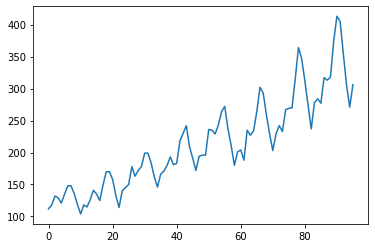

In [5]:
Airline.Passengers.plot()

In [6]:
Airline["Date"]=pd.to_datetime(Airline.Month,format="%b-%y")

In [7]:
Airline["month"]=Airline.Date.dt.strftime("%b")

In [8]:
Airline["year"]=Airline.Date.dt.strftime("%y")
Airline

,Month,Passengers,Date,month,year
0,1995-01-01,112,1995-01-01,Jan,95
1,1995-02-01,118,1995-02-01,Feb,95
2,1995-03-01,132,1995-03-01,Mar,95
3,1995-04-01,129,1995-04-01,Apr,95
4,1995-05-01,121,1995-05-01,May,95
...,...,...,...,...,...
91,2002-08-01,405,2002-08-01,Aug,02
92,2002-09-01,355,2002-09-01,Sep,02
93,2002-10-01,306,2002-10-01,Oct,02
94,2002-11-01,271,2002-11-01,Nov,02


In [9]:
plt.figure(figsize=(12,8))

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

In [10]:
HeatMonth=pd.pivot_table(data=Airline,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)

<AxesSubplot:xlabel='month', ylabel='year'>

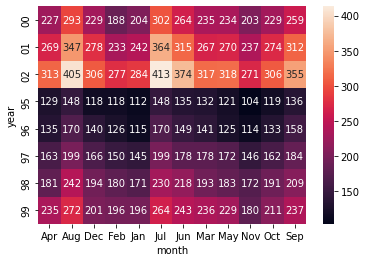

In [11]:
sns.heatmap(HeatMonth,annot=True,fmt="g")

<AxesSubplot:xlabel='year', ylabel='Passengers'>

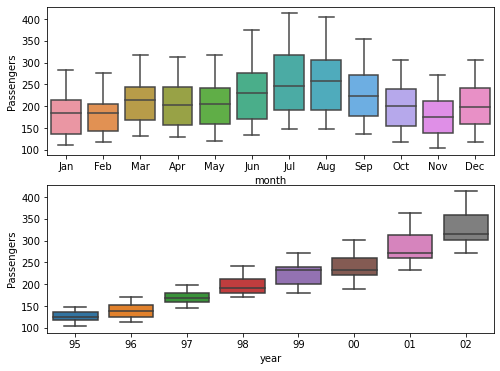

In [12]:
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data=Airline)
plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=Airline)

In [13]:
month=['jan','Feb','Mar','Apr','May','Jun','July','Aug','Sep','Oct','Nov','Dec']
A=Airline["month"][0]
A[0:3]
Airline["Month"]=0

In [14]:
for i in range(96):
    A= Airline["month"][i]
    Airline['month'][i]=A[0:3]

C:\Users\OSTRIC~1\AppData\Local\Temp/ipykernel_7340/4008205593.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['month'][i]=A[0:3]


In [15]:
Dummies=pd.DataFrame(pd.get_dummies(Airline['month']))

In [16]:
Airline1=pd.concat([Airline.Passengers,Dummies],axis=1)

In [17]:
Airline1["t"]=np.arange(1,97)

<AxesSubplot:>

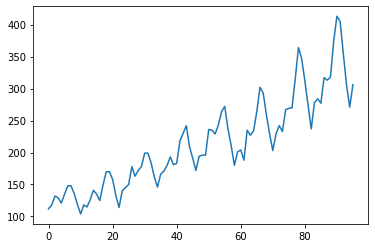

In [18]:
Airline1["t_square"]=Airline1["t"]*Airline1["t"]
Airline1.columns
Airline1['log_Passengers']=np.log(Airline1["Passengers"])
Airline1.rename(columns={"Passengers":'Passengers'},inplace=True)
Airline1.Passengers.plot()

In [19]:
Airline1

,Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,log_Passengers
0,112,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,118,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,132,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,129,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,121,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,405,0,1,0,0,0,0,0,0,0,0,0,0,92,8464,6.003887
92,355,0,0,0,0,0,0,0,0,0,0,0,1,93,8649,5.872118
93,306,0,0,0,0,0,0,0,0,0,0,1,0,94,8836,5.723585
94,271,0,0,0,0,0,0,0,0,0,1,0,0,95,9025,5.602119


<AxesSubplot:xlabel='year', ylabel='Passengers'>

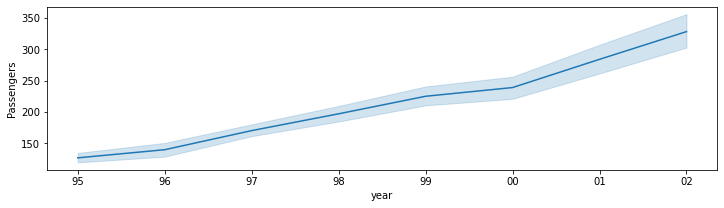

In [20]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Passengers",data=Airline)

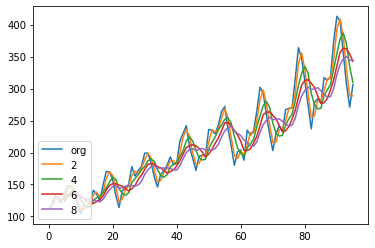

In [21]:
Airline.Passengers.plot(label="org")
for i in range(2,10,2):
    Airline["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)

<AxesSubplot:>

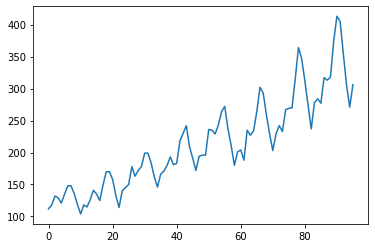

In [22]:
Airline.Passengers.plot()

In [23]:
Train=Airline1.head(65)

In [24]:
Test=Airline1.iloc[65:86,:]

In [25]:
Predicdata=Airline1.tail(10)


In [26]:
Airline2=Airline1.iloc[0:84,:]

In [27]:
Train

,Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,log_Passengers
0,112,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,118,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,132,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,129,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,121,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,204,0,0,0,0,1,0,0,0,0,0,0,0,61,3721,5.318120
61,188,0,0,0,1,0,0,0,0,0,0,0,0,62,3844,5.236442
62,235,0,0,0,0,0,0,0,1,0,0,0,0,63,3969,5.459586
63,227,1,0,0,0,0,0,0,0,0,0,0,0,64,4096,5.424950


In [28]:
Predicdata

,Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,log_Passengers
86,317,0,0,0,0,0,0,0,1,0,0,0,0,87,7569,5.758902
87,313,1,0,0,0,0,0,0,0,0,0,0,0,88,7744,5.746203
88,318,0,0,0,0,0,0,0,0,1,0,0,0,89,7921,5.762051
89,374,0,0,0,0,0,0,1,0,0,0,0,0,90,8100,5.924256
90,413,0,0,0,0,0,1,0,0,0,0,0,0,91,8281,6.023448
91,405,0,1,0,0,0,0,0,0,0,0,0,0,92,8464,6.003887
92,355,0,0,0,0,0,0,0,0,0,0,0,1,93,8649,5.872118
93,306,0,0,0,0,0,0,0,0,0,0,1,0,94,8836,5.723585
94,271,0,0,0,0,0,0,0,0,0,1,0,0,95,9025,5.602119
95,306,0,0,1,0,0,0,0,0,0,0,0,0,96,9216,5.723585


In [29]:
import statsmodels.formula.api as smf

In [30]:
LinearModel=smf.ols('Passengers~t',data=Train).fit()
PredLinear=pd.Series(LinearModel.predict(pd.DataFrame(Test['t'])))
rmseLinear=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(PredLinear))*2))
rmseLinear

5.592670161958381

In [31]:
Exp=smf.ols('log_Passengers~t',data=Train).fit()
PredExp=pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
RmseExp=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(PredExp)))**2))
RmseExp

37.57864730051231

In [32]:
Quad=smf.ols('Passengers~t+t_square',data=Train).fit()
PredQuad=pd.Series(Quad.predict(Test[['t','t_square']]))
RmseQuad=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(PredQuad))**2))
RmseQuad

41.81487905266069

In [33]:
AddSea=smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
Predaddsea=pd.Series(AddSea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_square']]))
rmse_add_sea=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(Predaddsea))*2))
rmse_add_sea

14.063913068333818

In [48]:
add_sea_Quad=smf.ols('Passengers~t + t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
Pred_add_sea_quad=pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_square']]))
rmse_add_sea_quad=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(Pred_add_sea_quad))*2))
rmse_add_sea_quad

5.347670887796404

In [49]:
Multiplicativesea=smf.ols('log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
PredictMultiplicativesea=pd.Series(Multiplicativesea.predict(Test))
rmseMultsea=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(PredictMultiplicativesea)))**2))
rmseMultsea

106.41103866662371

In [50]:
MultiplicativeAdditiveSea=smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
PredictMultiplicativeAdditivesea=pd.Series(MultiplicativeAdditiveSea.predict(Test))
rmse_Mult_add_sea=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(PredictMultiplicativeAdditivesea)))**2))
rmse_Mult_add_sea

12.178226716858166

In [51]:
data={'MODEL':pd.Series(["rmse_linear",'rmse_Exp',"rmse_Quad",'rmse_add_sea','rmse_add_sea_quad','rmse_Mult_sea','rmse_mult_add_sea']),"RMSE_Values":pd.Series([rmseLinear,RmseExp,RmseQuad,rmse_add_sea,rmse_add_sea_quad,rmseMultsea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_sea_quad,5.347671
0,rmse_linear,5.592670
6,rmse_mult_add_sea,12.178227
3,rmse_add_sea,14.063913
1,rmse_Exp,37.578647
2,rmse_Quad,41.814879
5,rmse_Mult_sea,106.411039


In [52]:
Predicdata

,Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,log_Passengers,forecasted_Passengers
86,317,0,0,0,0,0,0,0,1,0,0,0,0,87,7569,5.758902,5.823430
87,313,1,0,0,0,0,0,0,0,0,0,0,0,88,7744,5.746203,5.780500
88,318,0,0,0,0,0,0,0,0,1,0,0,0,89,7921,5.762051,5.768543
89,374,0,0,0,0,0,0,1,0,0,0,0,0,90,8100,5.924256,5.886514
90,413,0,0,0,0,0,1,0,0,0,0,0,0,91,8281,6.023448,5.980871
91,405,0,1,0,0,0,0,0,0,0,0,0,0,92,8464,6.003887,5.997013
92,355,0,0,0,0,0,0,0,0,0,0,0,1,93,8649,5.872118,5.892918
93,306,0,0,0,0,0,0,0,0,0,0,1,0,94,8836,5.723585,5.765042
94,271,0,0,0,0,0,0,0,0,0,1,0,0,95,9025,5.602119,5.633731
95,306,0,0,1,0,0,0,0,0,0,0,0,0,96,9216,5.723585,5.771897


In [53]:
Model=smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Airline2).fit()

In [54]:
pred_new=pd.Series(MultiplicativeAdditiveSea.predict(Predicdata))

In [55]:
pred_new

86    5.823430
87    5.780500
88    5.768543
89    5.886514
90    5.980871
91    5.997013
92    5.892918
93    5.765042
94    5.633731
95    5.771897
dtype: float64

In [56]:
Predicdata["forecasted_Passengers"]=pd.DataFrame(pred_new)

C:\Users\OSTRIC~1\AppData\Local\Temp/ipykernel_7340/3454535490.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Predicdata["forecasted_Passengers"]=pd.DataFrame(pred_new)


In [57]:
Predicdata

,Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,log_Passengers,forecasted_Passengers
86,317,0,0,0,0,0,0,0,1,0,0,0,0,87,7569,5.758902,5.823430
87,313,1,0,0,0,0,0,0,0,0,0,0,0,88,7744,5.746203,5.780500
88,318,0,0,0,0,0,0,0,0,1,0,0,0,89,7921,5.762051,5.768543
89,374,0,0,0,0,0,0,1,0,0,0,0,0,90,8100,5.924256,5.886514
90,413,0,0,0,0,0,1,0,0,0,0,0,0,91,8281,6.023448,5.980871
91,405,0,1,0,0,0,0,0,0,0,0,0,0,92,8464,6.003887,5.997013
92,355,0,0,0,0,0,0,0,0,0,0,0,1,93,8649,5.872118,5.892918
93,306,0,0,0,0,0,0,0,0,0,0,1,0,94,8836,5.723585,5.765042
94,271,0,0,0,0,0,0,0,0,0,1,0,0,95,9025,5.602119,5.633731
95,306,0,0,1,0,0,0,0,0,0,0,0,0,96,9216,5.723585,5.771897
